In [1]:
import pandas as pd

# Getting labelled TESS Objects of Interest dataframe from Caltech:
toi = pd.read_csv('https://exofop.ipac.caltech.edu/tess/' + 
                  'download_toi.php?sort=toi&output=csv')

# Isolating columns we want:
toi = toi[['TIC ID',
           'TOI',
           'Epoch (BJD)',
           'Period (days)',
           'Duration (hours)',
           'Depth (mmag)',
           'Planet Radius (R_Earth)',
           'Planet Insolation (Earth Flux)',
           'Planet Equil Temp (K)',
           'Planet SNR',
           'Stellar Distance (pc)',
           'Stellar log(g) (cm/s^2)',
           'Stellar Radius (R_Sun)',
           'TFOPWG Disposition',
          ]]

toi.columns = toi.columns.str.replace(' ', '_')

toi

,TIC_ID,TOI,Epoch_(BJD),Period_(days),Duration_(hours),Depth_(mmag),Planet_Radius_(R_Earth),Planet_Insolation_(Earth_Flux),Planet_Equil_Temp_(K),Planet_SNR,Stellar_Distance_(pc),Stellar_log(g)_(cm/s^2),Stellar_Radius_(R_Sun),TFOPWG_Disposition
0,231663901,101.01,2.458326e+06,1.430401,1.638765,22.436284,13.145008,1193.379561,1499.044062,0.887868,464.73200,4.34437,1.134870,KP
1,149603524,102.01,2.458326e+06,4.411943,3.776425,15.285609,15.397243,708.767112,1315.968940,474.380950,171.78800,4.73000,1.152290,KP
2,336732616,103.01,2.458327e+06,3.547854,3.494333,11.377523,14.581841,1212.004376,1504.858953,0.800299,316.73990,4.34015,1.121090,KP
3,231670397,104.01,2.458328e+06,4.087445,5.590140,3.900662,12.652102,1672.217546,1630.958624,0.808662,363.38850,3.62960,2.664420,KP
4,144065872,105.01,2.458327e+06,2.184659,2.869426,12.928190,12.514586,985.883704,1429.144596,0.886027,140.79530,4.22046,1.302410,KP
5,38846515,106.01,2.458327e+06,2.849380,3.776111,8.121677,9.061380,1311.315373,1534.781437,278.009500,331.84040,4.08295,1.727500,KP
6,92352620,107.01,2.458328e+06,3.950054,4.557506,14.207005,18.775574,1098.209548,1468.219722,0.860200,198.60660,4.10000,1.796870,KP
7,289793076,108.01,2.458328e+06,3.043839,2.660993,26.534793,13.999502,400.955287,1141.284018,0.820267,524.46900,4.41422,0.999971,KP
8,29344935,109.01,2.458326e+06,2.766737,2.568721,17.172409,11.661768,433.482954,1163.758204,0.834164,526.01500,4.43624,0.959997,KP
9,281459670,110.01,2.458328e+06,3.174305,2.723339,17.075061,13.668801,662.491006,1293.941810,100.352080,390.66100,3.57000,3.340860,KP


In [2]:
from astroquery.mast import Catalogs
from astropy.table import Table
from tqdm import tqdm

# Getting additional data on TESS Objects of Interest from STScI:
tic_catalog = pd.DataFrame()
for tic_id in tqdm(toi['TIC_ID'].unique()):
    row_data = Catalogs.query_criteria(catalog="Tic", ID=tic_id)
    row_data = row_data.to_pandas()
    tic_catalog = tic_catalog.append(row_data)
tic_catalog = tic_catalog.reset_index(drop=True)

# Renaming ID column to make this consistent with Caltech TOI dataframe:
tic_catalog = tic_catalog.rename(columns={'ID': 'TIC_ID'})

# Isolating columns we want:
tic_catalog = tic_catalog[['TIC_ID',
                           'ra',
                           'dec',
                           'pmRA',
                           'pmDEC',
                           'plx',
                           'gallong',
                           'gallat',
                           'eclong',
                           'eclat',
                           'Tmag',
                           'Teff',
                           'logg',
                           'MH',
                           'rad',
                           'mass',
                           'rho',
                           'lum',
                           'd',
                           'ebv',
                           'numcont',
                           'contratio',
                           'priority']]

tic_catalog.columns = tic_catalog.columns.str.replace(' ', '_')

tic_catalog

  0%|          | 0/1133 [00:00<?, ?it/s]/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: TableReplaceWarning: converted column 'HIP' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: TableReplaceWarning: converted column 'KIC' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
  1%|          | 7/1133 [00:03<08:00,  2.35it/s]/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: TableReplaceWarning: converted column 'numcont' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
100%|██████████| 1133/1133 [07:05<00:00,  2.69it/s]


,TIC_ID,ra,dec,pmRA,pmDEC,plx,gallong,gallat,eclong,eclat,...,MH,rad,mass,rho,lum,d,ebv,numcont,contratio,priority
0,231663901,318.736915,-55.871794,12.640900,-16.011100,2.636040,340.697786,-42.073791,302.236290,-37.755403,...,NaN,0.890774,1.050000,1.485550,0.822462,375.3100,0.033360,90.0,0.084449,0.000566
1,149603524,87.139974,-63.988441,-15.640500,26.046300,5.664860,273.415812,-31.033570,63.753180,-87.163848,...,0.240000,1.214270,1.280000,0.714926,2.216167,175.6310,0.020258,971.0,0.016392,0.007091
2,336732616,312.457439,-24.428761,10.425500,15.619900,2.404210,21.296861,-36.071882,308.207998,-6.444259,...,NaN,1.276160,1.270000,0.611063,2.417336,411.2110,0.044639,112.0,0.023094,0.000415
3,231670397,319.949611,-58.148887,10.552400,-10.658400,3.129230,337.503135,-42.110325,301.882378,-40.110165,...,NaN,2.218670,1.160000,0.106213,6.237656,316.6780,0.030207,81.0,0.004832,0.000773
4,144065872,337.457232,-48.003069,91.975700,-6.861290,7.241820,346.133880,-55.513481,319.330475,-35.437936,...,NaN,1.238240,1.030000,0.542529,1.518417,137.5440,0.006338,55.0,0.003545,0.002210
5,38846515,68.959709,-64.027037,10.845400,-0.499370,2.715340,275.107124,-38.852634,6.321110,-80.897840,...,NaN,1.774570,1.440000,0.257683,5.830600,364.4110,0.023686,87.0,0.068780,0.002905
6,92352620,313.783102,-34.135558,26.376100,-44.947000,4.706760,9.654727,-39.378419,306.588821,-16.089862,...,0.220000,1.710360,1.140000,0.227845,3.584022,211.2110,0.046266,118.0,0.637895,0.000955
7,289793076,316.961463,-26.096676,3.479370,-10.313000,2.342910,20.649158,-40.443561,311.676615,-9.194484,...,NaN,0.809868,0.950000,1.788470,0.519416,421.8550,0.048850,NaN,NaN,NaN
8,29344935,313.215470,-25.687333,1.053060,-9.881340,1.921190,20.031420,-37.083269,308.528104,-7.842339,...,NaN,0.984866,0.930000,0.973535,0.721826,513.0110,0.053547,NaN,NaN,NaN
9,281459670,5.618717,-59.942568,-22.309200,-4.892990,2.894070,309.554392,-56.811727,329.017969,-54.450077,...,-0.100000,1.157060,1.030000,0.664921,1.318858,342.1400,0.011021,47.0,2.934236,0.000552


In [3]:
from astroquery.mast import Observations

# Getting all dataproducts for TESS Objects of Interest from STScI:
dataproducts = pd.DataFrame()
for tic_id in tqdm(toi['TIC_ID'].unique()):
    row_data = Observations.query_criteria(obs_collection="TESS",
                                           target_name=tic_id)
    row_data = row_data.to_pandas()
    dataproducts = dataproducts.append(row_data)
dataproducts = dataproducts.reset_index(drop=True)

# Renaming ID column to make this consistent with Caltech TOI dataframe:
dataproducts = dataproducts.rename(columns={'target_name': 'TIC_ID'})

# Isolating TIC IDs (target_name) and dataURL values to get associated files:
dataproducts = dataproducts[['TIC_ID', 'dataURL']]

dataproducts.columns = dataproducts.columns.str.replace(' ', '_')

dataproducts

100%|██████████| 1133/1133 [02:51<00:00,  6.67it/s]


,TIC_ID,dataURL
0,231663901,mast:TESS/product/tess2018206045859-s0001-0000...
1,149603524,mast:TESS/product/tess2019006130736-s0007-0000...
2,149603524,mast:TESS/product/tess2018292075959-s0004-0000...
3,149603524,mast:TESS/product/tess2019032160000-s0008-0000...
4,149603524,mast:TESS/product/tess2018263035959-s0003-0000...
5,149603524,mast:TESS/product/tess2018349182459-s0006-0000...
6,149603524,mast:TESS/product/tess2018206190142-s0001-s000...
7,149603524,mast:TESS/product/tess2019058134432-s0009-0000...
8,149603524,mast:TESS/product/tess2018206190142-s0001-s000...
9,149603524,mast:TESS/product/tess2018206190142-s0001-s000...


In [4]:
# Getting list of unique TIC IDs in each of the three dataframes:
toi_unique_ids = toi['TIC_ID'].unique().tolist()
tic_catalog_unique_ids = tic_catalog['TIC_ID'].unique().tolist()
dataproducts_unique_ids = dataproducts['TIC_ID'].unique().tolist()
dataproducts_unique_ids = [int(tic_id) for tic_id in dataproducts_unique_ids]

# Comparing lists of unique TIC IDs for first two dataframes:
print("There are the same number of TIC IDs in the toi dataframe and the " +
      "tic_catalog dataframe:",
      len(toi_unique_ids) == len(tic_catalog_unique_ids), "\n")

# Comparing lists of unique TIC IDs for first and third dataframe:
print("There are the same number of TIC IDs in the toi dataframe and the " +
      "dataproducts dataframe:",
      len(toi_unique_ids) == len(dataproducts_unique_ids), "\n")

# Getting number of TIC IDs with no corresponding dataproduct:
missing_visualizations = [tic_id for tic_id in toi_unique_ids if tic_id
                          not in dataproducts_unique_ids]
print("Number of TIC IDs lacking dataproducts:",
      len(missing_visualizations), "\n\n\n")

# Getting number of dataproducts for each TIC ID in dataproducts dataframe:
print("Number of dataproducts per TIC ID:")
dataproducts['TIC_ID'].value_counts()

There are the same number of TIC IDs in the toi dataframe and the tic_catalog dataframe: True 

There are the same number of TIC IDs in the toi dataframe and the dataproducts dataframe: False 

Number of TIC IDs lacking dataproducts: 419 



Number of dataproducts per TIC ID:


382626661    18
25155310     18
309792357    18
350445771    18
300871545    18
300293197    18
38846515     18
300038935    18
260043723    18
29781292     18
260609205    18
260271203    18
260304296    18
55650590     18
391904697    17
278683844    17
55559618     17
350618622    17
141608198    17
55652896     17
149603524    17
32090583     17
167415965    17
260004324    17
141527579    17
30312676     17
149302744    16
375059587    16
391821647    16
271971130    16
             ..
281731203     1
455135327     1
325680697     1
176778112     1
101011575     1
420049884     1
455096220     1
306362738     1
29960109      1
35857242      1
445822015     1
190990336     1
42054565      1
13349647      1
409934330     1
231702397     1
37749396      1
43647325      1
174143743     1
366576758     1
237751146     1
33153766      1
186812530     1
92359850      1
322063810     1
452808876     1
1103432       1
387690507     1
117979455     1
394657039     1
Name: TIC_ID, Length: 71

In [5]:
# Getting list of all files in dataproducts:
urls = dataproducts['dataURL'].tolist()

# Getting list of all lc.fits files in dataproducts:
lcs = [url for url in urls if url.endswith('lc.fits')]

# Getting list of all dvt.fits files in dataproducts:
dvts = [url for url in urls if url.endswith('dvt.fits')]

# Making sure there are no other file types in dataproducts:
print("There are only lc.fits files and dvt.fits files in dataproducts:",
      len(urls) == len(lcs) + len(dvts))

There are only lc.fits files and dvt.fits files in dataproducts: True


Filename: /Users/nathanvanwyck/.astropy/cache/download/py3/213e77fbbf304b92a814b3c7f5a4190e
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   18684R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
None 

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; 

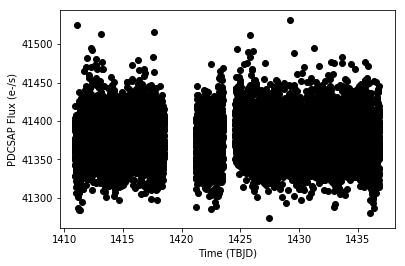

Filename: /Users/nathanvanwyck/.astropy/cache/download/py3/26fd0957f23f58dd549b38ec140a9d93
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   18944R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
None 

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; 

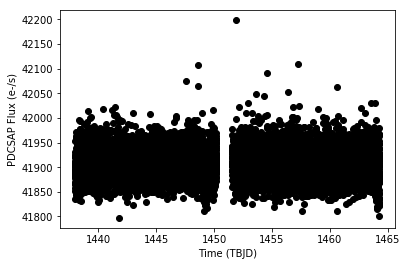

Filename: /Users/nathanvanwyck/.astropy/cache/download/py3/736d99848043233b6f553c0c9a86d148
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   17612R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
None 

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; 

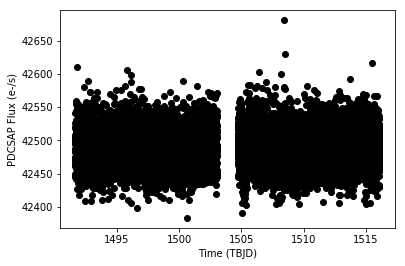

Filename: /Users/nathanvanwyck/.astropy/cache/download/py3/13df1729bb07933c9e9298ff68adc75c
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   17755R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (15, 15)   int32   
None 

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; 

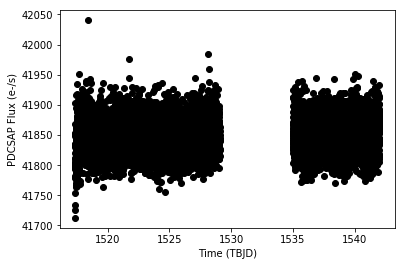

Filename: /Users/nathanvanwyck/.astropy/cache/download/py3/4000d8e006f19ec34528371d8e32ad13
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   19692R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
None 

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; 

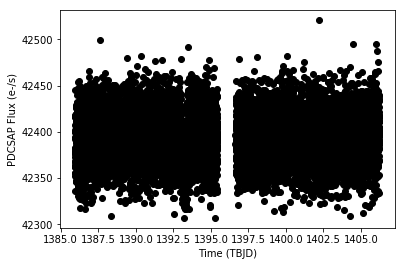

Filename: /Users/nathanvanwyck/.astropy/cache/download/py3/2d089288a8c4be827908d4d62f69c850
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   15678R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
None 

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; 

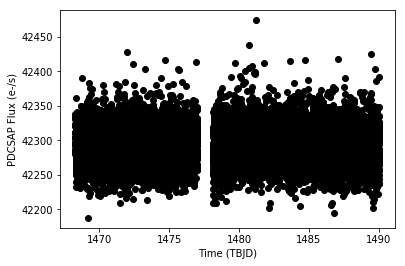

Filename: /Users/nathanvanwyck/.astropy/cache/download/py3/78eb9f2f60560730ef81d0591da5868a
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   19737R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
None 

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; 

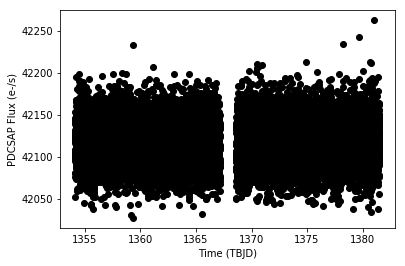

Filename: /Users/nathanvanwyck/.astropy/cache/download/py3/c50f04b4c524476d71baa33a737d3078
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   18187R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
None 

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; 

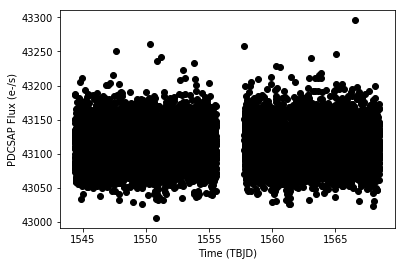

Filename: /Users/nathanvanwyck/.astropy/cache/download/py3/f9dae9e5f2ac627ab3a06fba77424840
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   18900R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
None 

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; 

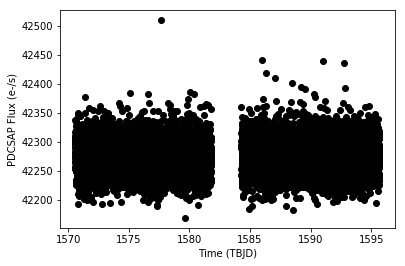

Filename: /Users/nathanvanwyck/.astropy/cache/download/py3/a442ee7d31abc139a447ada9966d6c09
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   19527R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
None 

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; 

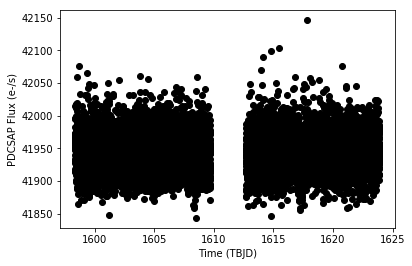

Filename: /Users/nathanvanwyck/.astropy/cache/download/py3/482245628b643e473663800e43947984
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   20076R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
None 

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; 

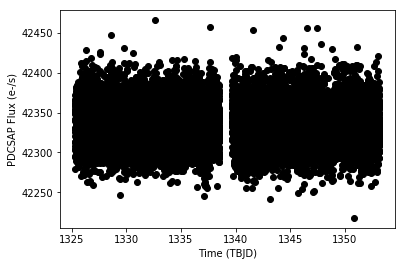

Filename: /Users/nathanvanwyck/.astropy/cache/download/py3/03001c7b76a6208bdd3de63e29302dfd
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   20119R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
None 

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; 

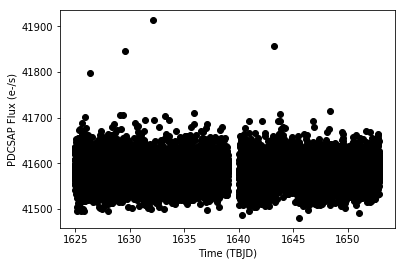

Filename: /Users/nathanvanwyck/.astropy/cache/download/py3/08368a0f848e73a85dc0a238799f212f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   20479R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
None 

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; 

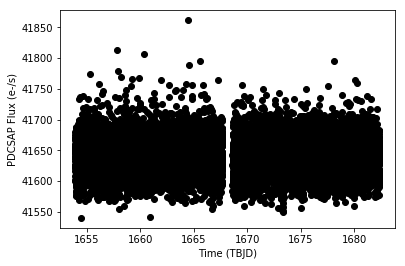

In [9]:
from astropy.io import fits
import matplotlib.pyplot as plt

# Getting urls for all dataproducts associated with TIC ID 29781292:
urls_for_29781292 = dataproducts[dataproducts['TIC_ID'] == '29781292'][
    'dataURL'].tolist()

# Getting urls for all lc.fits files associated with TIC ID 29781292:
lcs_for_29781292 = [url for url in urls_for_29781292 if 
                    url.endswith('lc.fits')]

# Describing and plotting all lc.fits files associated with TIC ID 29781292:
# See https://github.com/spacetelescope/notebooks/blob/master/notebooks/
# MAST/TESS/beginner_how_to_use_lc/beginner_how_to_use_lc.ipynb
for url in lcs_for_29781292:
    
    fits_file = ('https://mast.stsci.edu/api/v0.1/Download/file?uri=' + url)
    
    print(fits.info(fits_file), "\n")
    
    print(fits.getdata(fits_file, ext=1).columns)
    
    with fits.open(fits_file, mode="readonly") as hdulist:
        tess_bjds = hdulist[1].data['TIME']
        sap_fluxes = hdulist[1].data['SAP_FLUX']
        pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    
    fig, ax = plt.subplots()

    ax.plot(tess_bjds, pdcsap_fluxes, 'ko')

    ax.set_ylabel("PDCSAP Flux (e-/s)")
    ax.set_xlabel("Time (TBJD)")

    plt.show()

Filename: /Users/nathanvanwyck/.astropy/cache/download/py3/b0e9404718cf2c39ce051ba721405508
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      41   ()      
  1  TCE_1         1 BinTableHDU     92   40479R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  2  Statistics    1 BinTableHDU    157   40479R x 38C   [D, E, J, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
None 

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'PHASE'; format = 'E'; unit = 'days'; disp = 'E14.7'
    name = 'LC_INIT'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'LC_INIT_ERR'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'LC_WHITE'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'LC_DETREND'; f

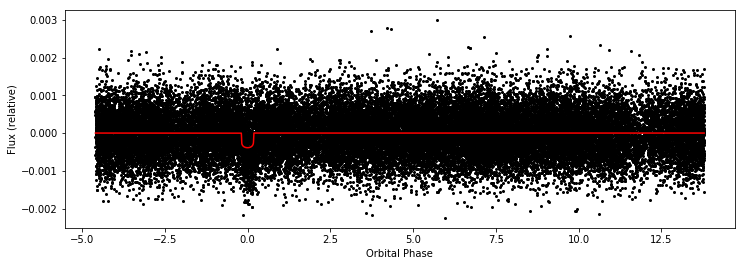

Filename: /Users/nathanvanwyck/.astropy/cache/download/py3/9c800a555bc1786a762ee85430d73c88
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      41   ()      
  1  TCE_1         1 BinTableHDU     92   58263R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  2  TCE_2         1 BinTableHDU     92   58263R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  3  Statistics    1 BinTableHDU    157   58263R x 38C   [D, E, J, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
None 

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'PHASE'; format = 'E'; unit = 'days'; disp = 'E14.7'
    name = 'LC_INIT'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'LC_INIT_ERR'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 

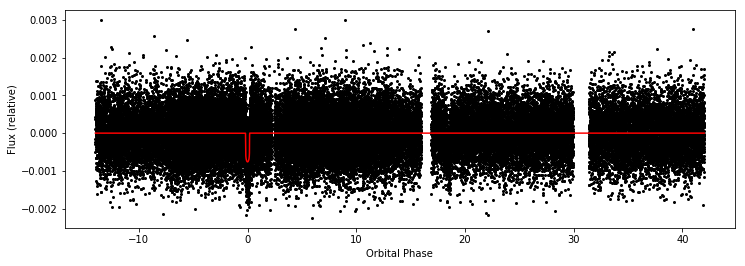

Filename: /Users/nathanvanwyck/.astropy/cache/download/py3/3587c43644a06a9d6b2b52281f51e6fc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      41   ()      
  1  TCE_1         1 BinTableHDU     92   175091R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  2  TCE_2         1 BinTableHDU     92   175091R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  3  TCE_3         1 BinTableHDU     92   175091R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  4  Statistics    1 BinTableHDU    157   175091R x 38C   [D, E, J, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
None 

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'PHASE'; format = 'E'; unit = 'days'; disp = 'E14.7'
    name = 'LC_INIT'; format = 'E'; unit = 'dimensionless'; disp = 'E1

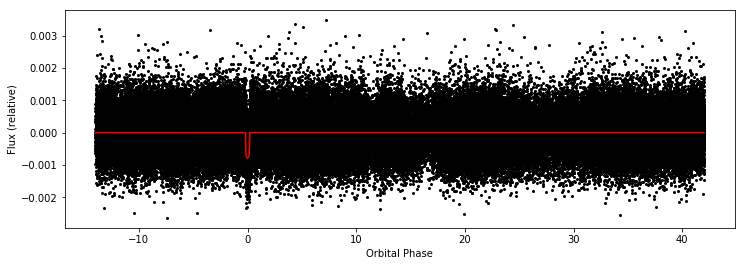

Filename: /Users/nathanvanwyck/.astropy/cache/download/py3/44720dcd808125b3e880a86cd70e4b76
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      41   ()      
  1  TCE_1         1 BinTableHDU     92   118621R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  2  TCE_2         1 BinTableHDU     92   118621R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  3  TCE_3         1 BinTableHDU     92   118621R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  4  Statistics    1 BinTableHDU    157   118621R x 38C   [D, E, J, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
None 

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'PHASE'; format = 'E'; unit = 'days'; disp = 'E14.7'
    name = 'LC_INIT'; format = 'E'; unit = 'dimensionless'; disp = 'E1

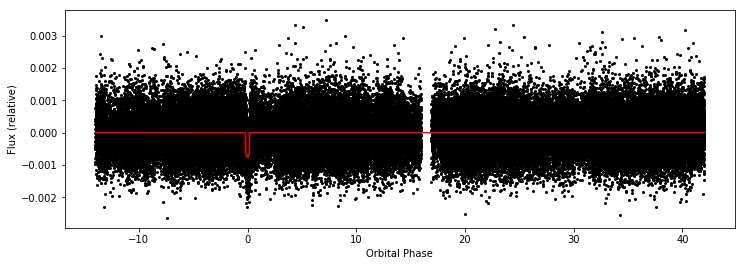

Filename: /Users/nathanvanwyck/.astropy/cache/download/py3/4b707d057eeaa4b10abda00dc676121f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      41   ()      
  1  TCE_1         1 BinTableHDU     92   257086R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  2  TCE_2         1 BinTableHDU     92   257086R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  3  TCE_3         1 BinTableHDU     92   257086R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  4  Statistics    1 BinTableHDU    157   257086R x 38C   [D, E, J, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
None 

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'PHASE'; format = 'E'; unit = 'days'; disp = 'E14.7'
    name = 'LC_INIT'; format = 'E'; unit = 'dimensionless'; disp = 'E1

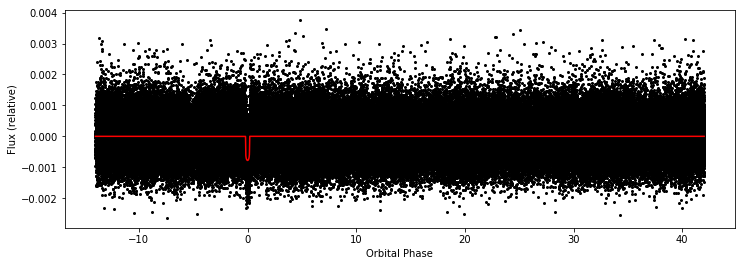

In [7]:
import numpy as np

# Getting urls for all dvt.fits files associated with TIC ID 29781292:
dvts_for_29781292 = [url for url in urls_for_29781292 if 
                    url.endswith('dvt.fits')]

# Describing and plotting all lc.fits files associated with TIC ID 29781292:
# See https://github.com/spacetelescope/notebooks/blob/master/notebooks/MAST/
# TESS/beginner_how_to_use_dvt/beginner_how_to_use_dvt.ipynb
for url in dvts_for_29781292:
    
    fits_file = ('https://mast.stsci.edu/api/v0.1/Download/file?uri=' + url)
    
    print(fits.info(fits_file), "\n")
    
    print(fits.getdata(fits_file, ext=1).columns)
    
    with fits.open(fits_file, mode="readonly") as hdulist:

        star_teff = hdulist[0].header['TEFF']
        star_logg = hdulist[0].header['LOGG']
        star_tmag = hdulist[0].header['TESSMAG']

        period = hdulist[1].header['TPERIOD']
        duration = hdulist[1].header['TDUR']
        epoch = hdulist[1].header['TEPOCH']
        depth = hdulist[1].header['TDEPTH']

        times = hdulist[1].data['TIME']
        phases = hdulist[1].data['PHASE']
        fluxes_init = hdulist[1].data['LC_INIT']
        model_fluxes_init = hdulist[1].data['MODEL_INIT']
    
    sort_indexes = np.argsort(phases)

    fig, ax = plt.subplots(figsize=(12,4))

    ax.plot(phases[sort_indexes], fluxes_init[sort_indexes], 'ko',
           markersize=2)

    ax.plot(phases[sort_indexes], model_fluxes_init[sort_indexes], '-r')

    ax.set_ylabel("Flux (relative)")
    ax.set_xlabel("Orbital Phase")

    plt.show()

In [8]:
toi.to_csv('toi_example.csv')
tic_catalog.to_csv('tic_catalog_example.csv')
dataproducts.to_csv('dataproducts_example.csv')